#**Remittance patterns and economic development**





In [2]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Loading the dataset

In [4]:
#loading data
# importing the dataset
#url="https://raw.githubusercontent.com/MiracleUche123/CatBoost-Team-Project/main/Cleaned%20Data/Remittance%20Merged%201970%20-%202022.csv"
#url="https://raw.githubusercontent.com/MiracleUche123/CatBoost-Team-Project/main/merged_with_data.csv"
#url="https://raw.githubusercontent.com/MiracleUche123/CatBoost-Team-Project/main/remitance_merged_migration.csv"
url= "https://github.com/MiracleUche123/CatBoost-Team-Project/blob/main/Cleaned%20Data/final_remittance_data.csv"
data = pd.read_csv("final_remittance_data.csv")
# making sure the data was imported correctly
data.head(50)

,Year,country_code,country_name,new_income_group,new_region,population,remittance_growth_rate,remittance_paid,remittance_per_capita,remittance_received,remittance_volatility,unemployment_rate,unemployment_rate_change,net_migration,gdp,remittance_to_gdp_ratio
0,1970,AFG,Afghanistan,Low income,South Asia,10752971,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,4458,1.748887e+09,0.000000
1,1971,AFG,Afghanistan,Low income,South Asia,11015857,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,-12801,1.831109e+09,0.000000
2,1972,AFG,Afghanistan,Low income,South Asia,11286753,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,-4050,1.595555e+09,0.000000
3,1973,AFG,Afghanistan,Low income,South Asia,11575305,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,-3030,1.733333e+09,0.000000
4,1974,AFG,Afghanistan,Low income,South Asia,11869879,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,-20009,2.155555e+09,0.000000
5,1975,AFG,Afghanistan,Low income,South Asia,12157386,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,-44418,2.366667e+09,0.000000
6,1976,AFG,Afghanistan,Low income,South Asia,12425267,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,-85430,2.555556e+09,0.000000
7,1977,AFG,Afghanistan,Low income,South Asia,12687301,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,-83115,2.953333e+09,0.000000
8,1978,AFG,Afghanistan,Low income,South Asia,12938862,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,-117186,3.300000e+09,0.000000
9,1979,AFG,Afghanistan,Low income,South Asia,12986369,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,-481199,3.697940e+09,0.000000


In [5]:
data.columns

Index(['Year', 'country_code', 'country_name', 'new_income_group',
       'new_region', 'population', 'remittance_growth_rate', 'remittance_paid',
       'remittance_per_capita', 'remittance_received', 'remittance_volatility',
       'unemployment_rate', 'unemployment_rate_change', 'net_migration', 'gdp',
       'remittance_to_gdp_ratio'],
      dtype='object')

#2. Understanding the data

here: description of the columns that we are using

#3. Exploratory Data Analysis

##3.1 Dataset Description

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10176 entries, 0 to 10175
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      10176 non-null  int64  
 1   country_code              10176 non-null  object 
 2   country_name              10176 non-null  object 
 3   new_income_group          10176 non-null  object 
 4   new_region                10176 non-null  object 
 5   population                10176 non-null  int64  
 6   remittance_growth_rate    10176 non-null  float64
 7   remittance_paid           10176 non-null  float64
 8   remittance_per_capita     10176 non-null  float64
 9   remittance_received       10176 non-null  float64
 10  remittance_volatility     10176 non-null  float64
 11  unemployment_rate         10176 non-null  float64
 12  unemployment_rate_change  10176 non-null  float64
 13  net_migration             10176 non-null  int64  
 14  gdp   

In [7]:
data.shape

(10176, 16)

In [8]:
data.describe()

,Year,population,remittance_growth_rate,remittance_paid,remittance_per_capita,remittance_received,remittance_volatility,unemployment_rate,unemployment_rate_change,net_migration,gdp,remittance_to_gdp_ratio
count,10176.00000,1.017600e+04,1.017600e+04,1.017600e+04,10176.000000,1.017600e+04,1.017600e+04,10176.000000,10176.000000,1.017600e+04,1.017600e+04,1.017600e+04
mean,1996.00000,3.004534e+07,inf,8.430714e+08,86.637604,1.125116e+09,1.315537e+09,4.437800,-0.000568,1.470797e+02,1.942604e+11,inf
std,15.29781,1.168006e+08,NaN,3.860485e+09,224.302900,4.248909e+09,3.172005e+09,5.982877,0.792412,1.597650e+05,1.049969e+12,NaN
min,1970.00000,5.814000e+03,-1.000000e+02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,-7.300000,-2.290411e+06,0.000000e+00,0.000000e+00
25%,1983.00000,1.341673e+06,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,4.833108e+07,0.000000,-0.020000,-1.757425e+04,7.335918e+08,0.000000e+00
50%,1996.00000,5.781454e+06,0.000000e+00,8.844155e+06,6.156980,2.345000e+07,2.983998e+08,2.132000,0.000000,-9.420000e+02,6.907830e+09,2.379131e-03
75%,2009.00000,1.839501e+07,1.088905e+01,1.520000e+08,76.432194,5.704182e+08,1.089087e+09,7.099250,0.007000,7.353000e+03,5.254539e+10,2.355703e-02
max,2022.00000,1.417173e+09,inf,7.915300e+10,3800.143404,1.110000e+11,3.185556e+10,38.800000,19.708000,1.866819e+06,2.550000e+13,inf


Verifing the existence of duplicated data:

In [9]:
dupl_check = data[data.duplicated()]

print(dupl_check.duplicated().sum())

0


## 3.2 Data Visualization

### 3.2.1 *Histogram*

ValueError: ignored

<Figure size 2000x1500 with 0 Axes>

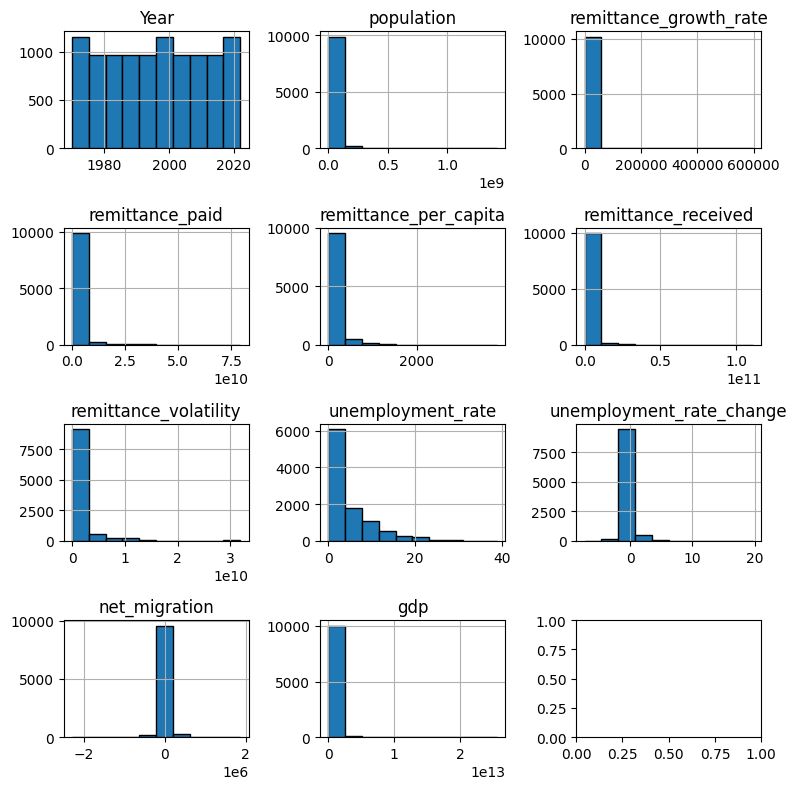

In [11]:
fig = plt.figure(figsize = (20, 15))
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams["figure.autolayout"] = True

data_hist=data.copy()
data_hist['remittance_growth_rate'].replace(np.inf, 0, inplace=True)
data_hist['unemployment_rate_change'].replace(np.inf, 0, inplace=True)
data_hist.hist(edgecolor='black')
plt.suptitle("Histogram of Numerical variables", fontsize=15)
plt.show()

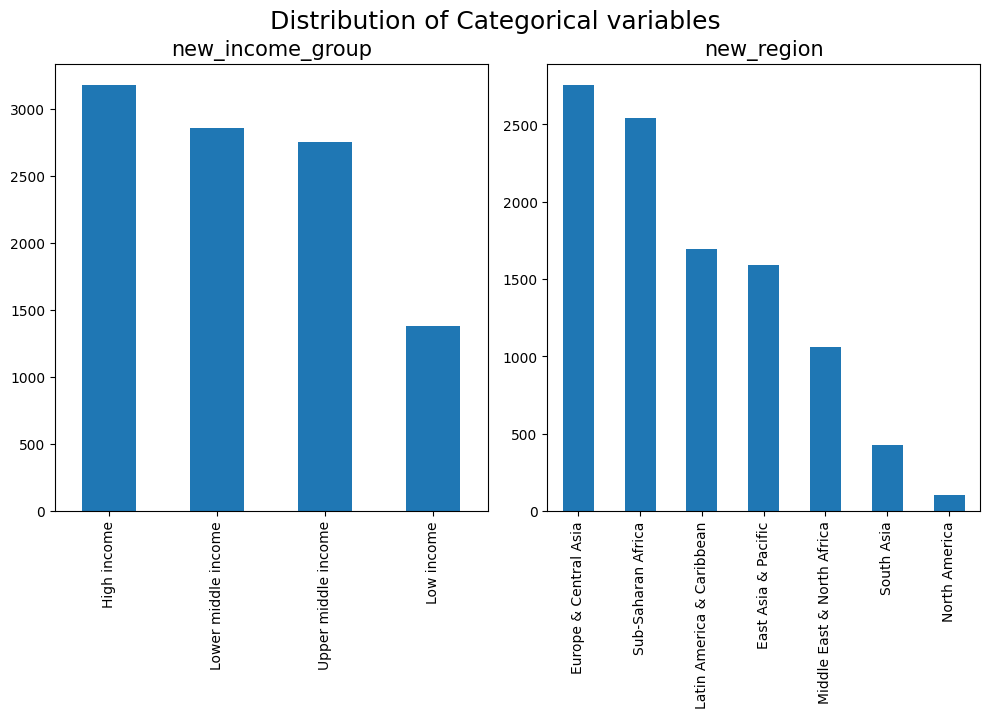

In [12]:
cat_list=['new_income_group', 'new_region']
fig = plt.figure(figsize = (10, 12))
fig.suptitle("Distribution of Categorical variables", fontsize=18)
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.rcParams["figure.autolayout"] = True

ax=plt.subplot(2,2,1)
data[cat_list[0]].value_counts().plot(kind='bar')
ax=plt.title(cat_list[0],fontsize=15)
plt.tick_params(labelsize=10)

ax=plt.subplot(2,2,2)
data[cat_list[1]].value_counts().plot(kind='bar')
ax.set_title(cat_list[1],fontsize=15)
plt.tick_params(labelsize=10)

fig.tight_layout()

### 3.2.2 Time series plot

In [13]:
#

import plotly.express as px
import plotly.graph_objs as go

graph_plot=data.query("new_region !='0'")
graph_plot=graph_plot[['remittance_received','new_region','Year']]\
      .groupby(['Year','new_region'])['remittance_received'].sum()\
      .to_frame(name='remittance_received').reset_index()
#graph_plot.query("total_attacks==1")
fig = px.line(graph_plot, x='Year', y='remittance_received', color="new_region")
fig.update_layout(title="Remittance recieved from\n 1970 to 2022 by region")
fig.show()

In [14]:
graph_plot=data.query("new_region !='0'")
graph_plot=graph_plot[['remittance_paid','new_region','Year']]\
      .groupby(['Year','new_region'])['remittance_paid'].sum()\
      .to_frame(name='remittance_paid').reset_index()
#graph_plot.query("total_attacks==1")
fig = px.line(graph_plot, x='Year', y='remittance_paid', color="new_region")
fig.update_layout(title="Remittance paid from\n 1970 to 2022 by region")
fig.show()

### 3.2.3  Trend, patterns, seasonality

plot and explanation, I tried but I wasn't sucess, you are experts so you are going to make it.



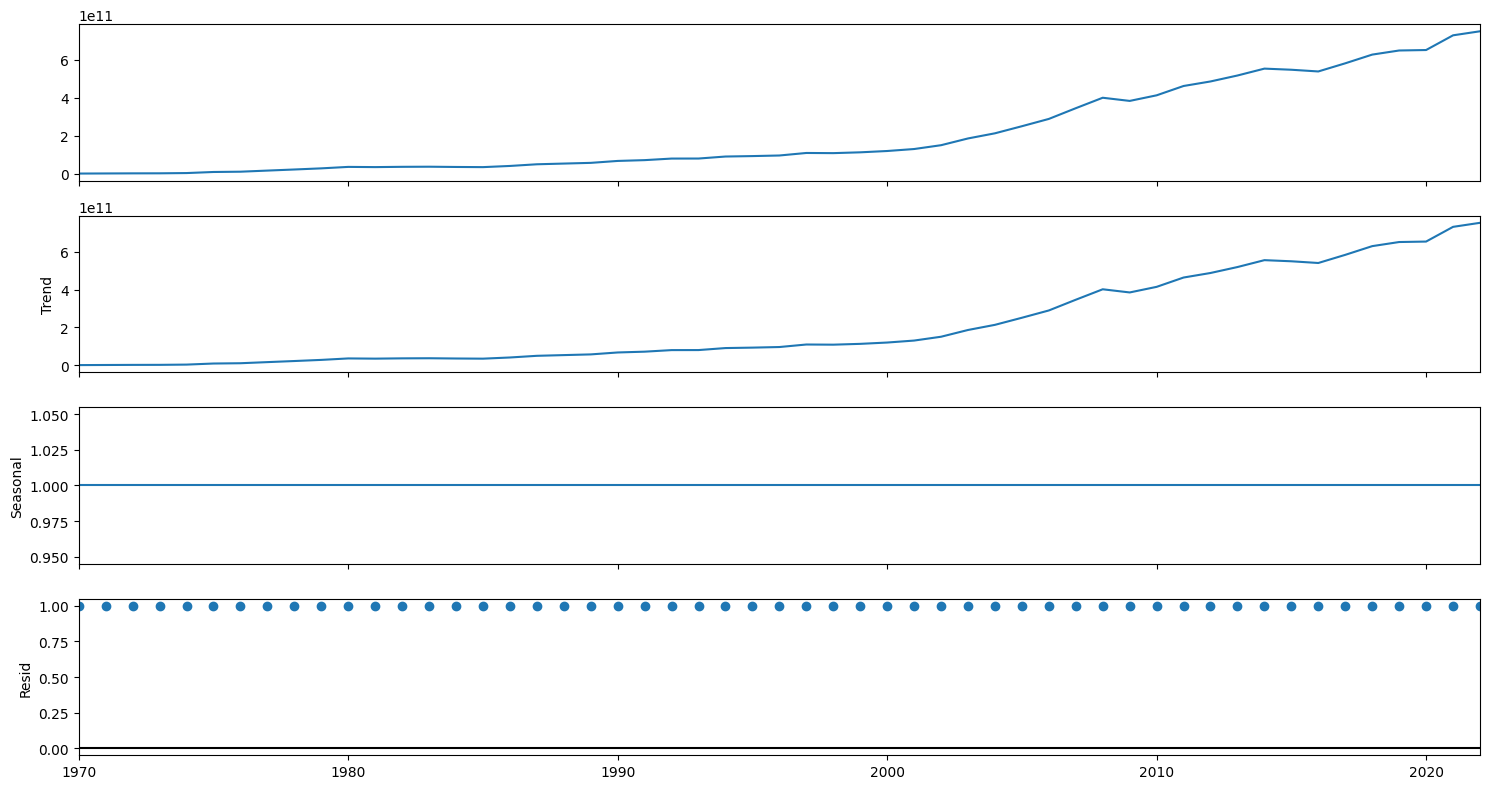

In [15]:
import statsmodels.api as sm
from pylab import rcParams
from datetime import datetime

rcParams[ 'figure.figsize' ] = 15 , 8

data_trend=data.copy()
for i in data_trend['Year']:
           n = datetime.strptime(str(i), '%Y').date()
           i=n
data_trend.sort_values(by='Year', ascending=True,inplace=True)
data_trend['Year'] = pd.to_datetime(data_trend['Year'],format='%Y')
decompose_series = sm.tsa.seasonal_decompose(data_trend[['Year','remittance_received']].groupby('Year').sum(), model= 'multiplicative') #'multiplicative'
#decompose_series = sm.tsa.seasonal_decompose(data_trend[['Year','remittance_received']], model= 'additive' )
decompose_series.plot()
plt.show()


## 4. Data Cleaning and Preprocessing

In [16]:
## How to work with the 0 values of region and income? I left it as a variable but I would like your opinion about it, like change the name of it<<-

## 4.1 Drop unnecessary columns

In [17]:
new_data=data.drop(columns = ['country_code','Year'])



## 4.2 Replacing infinite values

I replace it with 0 but I will stay with your decission.



In [18]:
new_data['remittance_growth_rate'].replace(np.inf, 0, inplace=True)
new_data['unemployment_rate_change'].replace(np.inf, 0, inplace=True)

In [19]:
new_data.head(50)

,country_name,new_income_group,new_region,population,remittance_growth_rate,remittance_paid,remittance_per_capita,remittance_received,remittance_volatility,unemployment_rate,unemployment_rate_change,net_migration,gdp,remittance_to_gdp_ratio
0,Afghanistan,Low income,South Asia,10752971,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,4458,1.748887e+09,0.000000
1,Afghanistan,Low income,South Asia,11015857,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,-12801,1.831109e+09,0.000000
2,Afghanistan,Low income,South Asia,11286753,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,-4050,1.595555e+09,0.000000
3,Afghanistan,Low income,South Asia,11575305,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,-3030,1.733333e+09,0.000000
4,Afghanistan,Low income,South Asia,11869879,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,-20009,2.155555e+09,0.000000
5,Afghanistan,Low income,South Asia,12157386,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,-44418,2.366667e+09,0.000000
6,Afghanistan,Low income,South Asia,12425267,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,-85430,2.555556e+09,0.000000
7,Afghanistan,Low income,South Asia,12687301,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,-83115,2.953333e+09,0.000000
8,Afghanistan,Low income,South Asia,12938862,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,-117186,3.300000e+09,0.000000
9,Afghanistan,Low income,South Asia,12986369,0.000000,0.0,0.000000,0.000000e+00,293485541.0,0.000,0.000,-481199,3.697940e+09,0.000000


### 4.3 Managing important variables with zero values

there are some cases where the values are 0 in the most important features like gdp, unemployment, remitance recieved and paid. I delete if they have 0 values in three of them but I will stay with your decission.

In [20]:
#not work with 0 data quantity :

#for i in data:
    #remittance_received	remittance_paid	gdp	unemployment_rate

new_data = new_data.loc[~((new_data['remittance_received'] == 0) & (new_data['remittance_paid'] == 0)&(new_data['unemployment_rate'] == 0) )]

In [21]:
new_data=new_data.reset_index()

In [22]:
new_data=new_data.drop(columns = ['index'])

In [23]:
new_data.head(10)

,country_name,new_income_group,new_region,population,remittance_growth_rate,remittance_paid,remittance_per_capita,remittance_received,remittance_volatility,unemployment_rate,unemployment_rate_change,net_migration,gdp,remittance_to_gdp_ratio
0,Afghanistan,Low income,South Asia,10745167,0.0,0.0,0.0,0.0,293485541.0,8.121,0.000,39926,0.0,0.0
1,Afghanistan,Low income,South Asia,12057433,0.0,0.0,0.0,0.0,293485541.0,8.168,0.047,1834556,0.0,0.0
2,Afghanistan,Low income,South Asia,14003760,0.0,0.0,0.0,0.0,293485541.0,8.123,-0.045,1171818,0.0,0.0
3,Afghanistan,Low income,South Asia,15455555,0.0,0.0,0.0,0.0,293485541.0,8.111,-0.012,665410,0.0,0.0
4,Afghanistan,Low income,South Asia,16418912,0.0,0.0,0.0,0.0,293485541.0,8.260,0.149,71824,0.0,0.0
5,Afghanistan,Low income,South Asia,17106595,0.0,0.0,0.0,0.0,293485541.0,8.165,-0.095,27194,0.0,0.0
6,Afghanistan,Low income,South Asia,17788819,0.0,0.0,0.0,0.0,293485541.0,8.089,-0.076,6129,0.0,0.0
7,Afghanistan,Low income,South Asia,18493132,0.0,0.0,0.0,0.0,293485541.0,8.082,-0.007,35740,0.0,0.0
8,Afghanistan,Low income,South Asia,19262847,0.0,0.0,0.0,0.0,293485541.0,8.070,-0.012,85758,0.0,0.0
9,Afghanistan,Low income,South Asia,19542982,0.0,0.0,0.0,0.0,293485541.0,8.054,-0.016,-1007135,0.0,0.0




## 4.4 Encoding


In [28]:
# one hot encoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

#creating encoders
numerical_preprocessor = StandardScaler()


In [29]:
#creating categorical and numerical list
from sklearn.compose import make_column_selector as selector
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(new_data)
categorical_columns = categorical_columns_selector(new_data)

In [30]:
categorical_columns

['country_name', 'new_income_group', 'new_region']

In [31]:
numerical_columns

['population',
 'remittance_growth_rate',
 'remittance_paid',
 'remittance_per_capita',
 'remittance_received',
 'remittance_volatility',
 'unemployment_rate',
 'unemployment_rate_change',
 'net_migration',
 'gdp',
 'remittance_to_gdp_ratio']

In [32]:
target = ['gdp', 'unemployment_rate']
features_cols=[col for col in numerical_columns if col not in target]
features_cols

['population',
 'remittance_growth_rate',
 'remittance_paid',
 'remittance_per_capita',
 'remittance_received',
 'remittance_volatility',
 'unemployment_rate_change',
 'net_migration',
 'remittance_to_gdp_ratio']

In [37]:
new_data.shape

(7716, 14)

In [39]:
new_data.replace([np.inf, -np.inf], 0, inplace=True)

### 4.4.1 Standar Scaler

In [82]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


scaled_features = MinMaxScaler().fit_transform(new_data[features_cols])
#scaled_features = StandardScaler().fit_transform(new_data)
num_features = pd.DataFrame(data=scaled_features)
num_features.rename(columns=dict(zip(num_features.columns.tolist(), features_cols)), inplace=True)

In [83]:
num_features

,population,remittance_growth_rate,remittance_paid,remittance_per_capita,remittance_received,remittance_volatility,unemployment_rate_change,net_migration,remittance_to_gdp_ratio
0,0.007575,0.000167,0.000000,0.000000,0.000000,0.009213,0.270290,0.560550,0.000000
1,0.008501,0.000167,0.000000,0.000000,0.000000,0.009213,0.272031,0.992239,0.000000
2,0.009875,0.000167,0.000000,0.000000,0.000000,0.009213,0.268624,0.832821,0.000000
3,0.010899,0.000167,0.000000,0.000000,0.000000,0.009213,0.269846,0.711007,0.000000
4,0.011579,0.000167,0.000000,0.000000,0.000000,0.009213,0.275807,0.568223,0.000000
...,...,...,...,...,...,...,...,...,...
7711,0.010615,0.000138,0.000370,0.024960,0.012862,0.027882,0.288988,0.536533,0.017717
7712,0.010828,0.000166,0.000170,0.024285,0.012766,0.027882,0.291988,0.536533,0.027510
7713,0.011050,0.000217,0.000274,0.030766,0.016505,0.027882,0.289840,0.543741,0.036101
7714,0.011279,0.000181,0.000000,0.032611,0.017856,0.027882,0.276548,0.544932,0.029611


In [72]:
# separate data to join later
cat_data=new_data[categorical_columns]
target_var=new_data[target]

In [73]:
cat_data

,country_name,new_income_group,new_region
0,Afghanistan,Low income,South Asia
1,Afghanistan,Low income,South Asia
2,Afghanistan,Low income,South Asia
3,Afghanistan,Low income,South Asia
4,Afghanistan,Low income,South Asia
...,...,...,...
7711,Zimbabwe,Lower middle income,Sub-Saharan Africa
7712,Zimbabwe,Lower middle income,Sub-Saharan Africa
7713,Zimbabwe,Lower middle income,Sub-Saharan Africa
7714,Zimbabwe,Lower middle income,Sub-Saharan Africa


In [74]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat_dict = {}
for col in categorical_columns:
    cat_data[col] = encoder.fit_transform(cat_data[col])
    col_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    cat_dict[col] = col_mapping

<ipython-input-74-d80871cc4069>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-74-d80871cc4069>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-74-d80871cc4069>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
cat_data

,country_name,new_income_group,new_region
0,0,1,5
1,0,1,5
2,0,1,5
3,0,1,5
4,0,1,5
...,...,...,...
7711,189,2,6
7712,189,2,6
7713,189,2,6
7714,189,2,6


In [85]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


cat_scaled_features = MinMaxScaler().fit_transform(cat_data)
#scaled_features = StandardScaler().fit_transform(new_data)
cat_num_features = pd.DataFrame(data=cat_scaled_features)
cat_num_features.rename(columns=dict(zip(cat_num_features.columns.tolist(), categorical_columns)), inplace=True)

In [86]:
cat_num_features

,country_name,new_income_group,new_region
0,0.0,0.333333,0.833333
1,0.0,0.333333,0.833333
2,0.0,0.333333,0.833333
3,0.0,0.333333,0.833333
4,0.0,0.333333,0.833333
...,...,...,...
7711,1.0,0.666667,1.000000
7712,1.0,0.666667,1.000000
7713,1.0,0.666667,1.000000
7714,1.0,0.666667,1.000000


In [87]:
scaled_data = pd.concat([num_features, cat_num_features, target_var], axis = 1)
scaled_data

,population,remittance_growth_rate,remittance_paid,remittance_per_capita,remittance_received,remittance_volatility,unemployment_rate_change,net_migration,remittance_to_gdp_ratio,country_name,new_income_group,new_region,gdp,unemployment_rate
0,0.007575,0.000167,0.000000,0.000000,0.000000,0.009213,0.270290,0.560550,0.000000,0.0,0.333333,0.833333,0.000000e+00,8.121
1,0.008501,0.000167,0.000000,0.000000,0.000000,0.009213,0.272031,0.992239,0.000000,0.0,0.333333,0.833333,0.000000e+00,8.168
2,0.009875,0.000167,0.000000,0.000000,0.000000,0.009213,0.268624,0.832821,0.000000,0.0,0.333333,0.833333,0.000000e+00,8.123
3,0.010899,0.000167,0.000000,0.000000,0.000000,0.009213,0.269846,0.711007,0.000000,0.0,0.333333,0.833333,0.000000e+00,8.111
4,0.011579,0.000167,0.000000,0.000000,0.000000,0.009213,0.275807,0.568223,0.000000,0.0,0.333333,0.833333,0.000000e+00,8.260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7711,0.010615,0.000138,0.000370,0.024960,0.012862,0.027882,0.288988,0.536533,0.017717,1.0,0.666667,1.000000,3.415607e+10,6.784
7712,0.010828,0.000166,0.000170,0.024285,0.012766,0.027882,0.291988,0.536533,0.027510,1.0,0.666667,1.000000,2.183223e+10,7.370
7713,0.011050,0.000217,0.000274,0.030766,0.016505,0.027882,0.289840,0.543741,0.036101,1.0,0.666667,1.000000,2.150970e+10,7.898
7714,0.011279,0.000181,0.000000,0.032611,0.017856,0.027882,0.276548,0.544932,0.029611,1.0,0.666667,1.000000,2.837124e+10,8.067


4.4.2 Categorical encoder

In [55]:
# !pip install category_encoders
# import category_encoders as ce


In [56]:
# encoder = ce.BaseNEncoder(cols=categorical_columns, return_df=True, base=2)
# process_data = encoder.fit_transform(scaled_data, columns=categorical_columns)

In [57]:
# process_data.head()

# 5. Correlation and linear relation between variables

Correlation graph and linear regression between gdp and unemployment between remittance recieved and remittance paid.

In [ ]:
#correlation graph

<ipython-input-88-74f9d55fe2a7>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



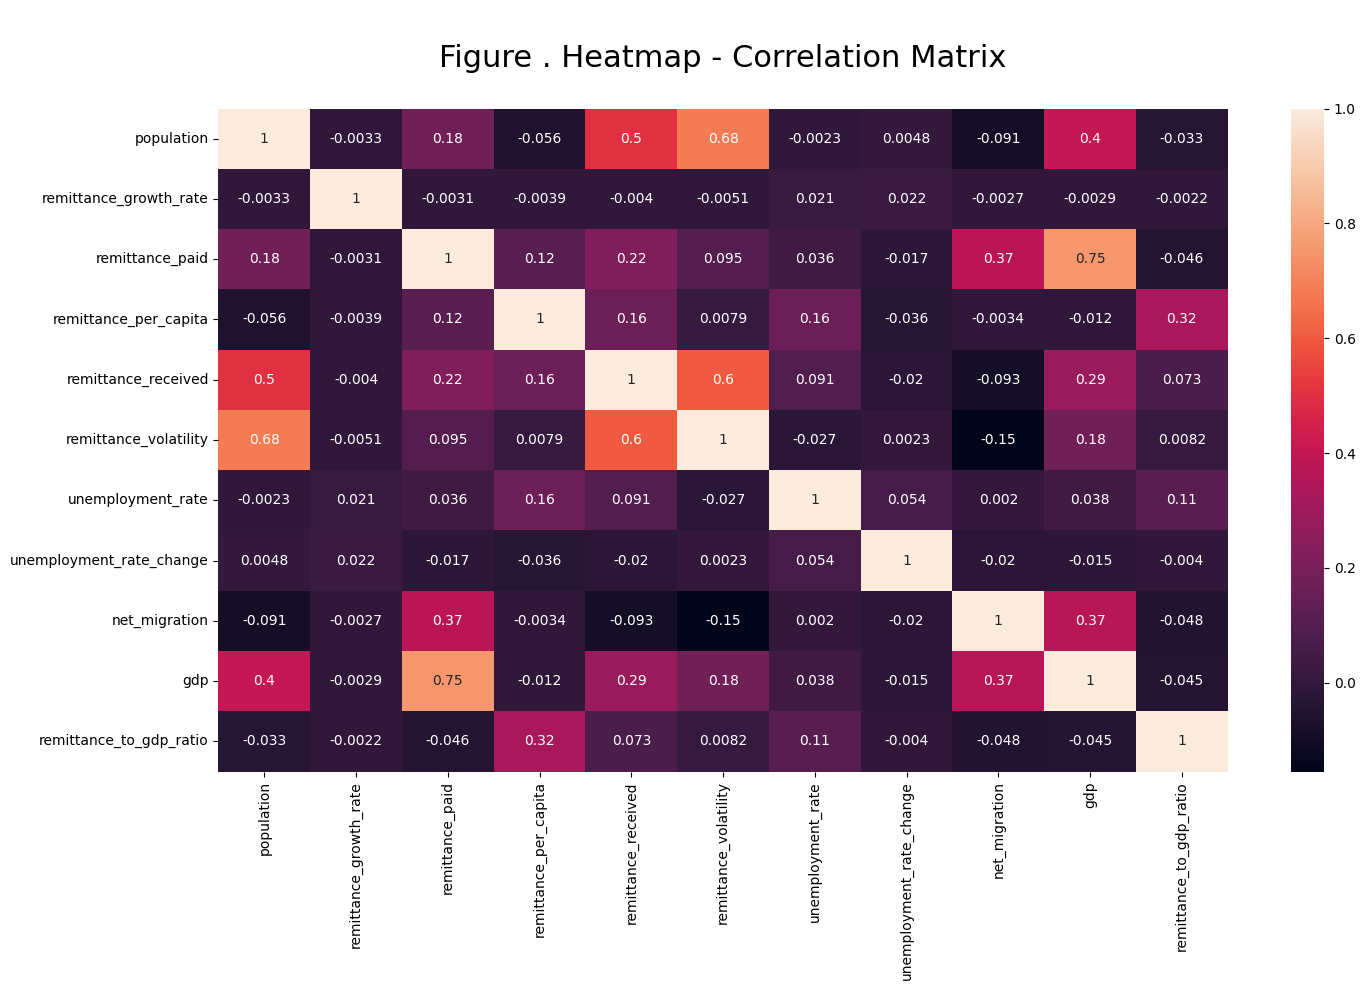

In [88]:
plt.figure(figsize=(15, 10))

corr_matrix = new_data.corr()
features = corr_matrix.index
plt.xticks(rotation = 90)
plt.title("\nFigure . Heatmap - Correlation Matrix\n", fontsize=22)
corr_heatmap = sns.heatmap(data[features].corr(),annot=True)

# 6. Developing & Evaluating Classification Models

In [ ]:
#spliting data
#I worked with two target variables according our project

In [89]:
X = scaled_data.drop(columns = ['gdp','unemployment_rate']) # input features
Y = scaled_data[['gdp','unemployment_rate']]

In [90]:
X

,population,remittance_growth_rate,remittance_paid,remittance_per_capita,remittance_received,remittance_volatility,unemployment_rate_change,net_migration,remittance_to_gdp_ratio,country_name,new_income_group,new_region
0,0.007575,0.000167,0.000000,0.000000,0.000000,0.009213,0.270290,0.560550,0.000000,0.0,0.333333,0.833333
1,0.008501,0.000167,0.000000,0.000000,0.000000,0.009213,0.272031,0.992239,0.000000,0.0,0.333333,0.833333
2,0.009875,0.000167,0.000000,0.000000,0.000000,0.009213,0.268624,0.832821,0.000000,0.0,0.333333,0.833333
3,0.010899,0.000167,0.000000,0.000000,0.000000,0.009213,0.269846,0.711007,0.000000,0.0,0.333333,0.833333
4,0.011579,0.000167,0.000000,0.000000,0.000000,0.009213,0.275807,0.568223,0.000000,0.0,0.333333,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...
7711,0.010615,0.000138,0.000370,0.024960,0.012862,0.027882,0.288988,0.536533,0.017717,1.0,0.666667,1.000000
7712,0.010828,0.000166,0.000170,0.024285,0.012766,0.027882,0.291988,0.536533,0.027510,1.0,0.666667,1.000000
7713,0.011050,0.000217,0.000274,0.030766,0.016505,0.027882,0.289840,0.543741,0.036101,1.0,0.666667,1.000000
7714,0.011279,0.000181,0.000000,0.032611,0.017856,0.027882,0.276548,0.544932,0.029611,1.0,0.666667,1.000000


In [91]:
features_cols

['population',
 'remittance_growth_rate',
 'remittance_paid',
 'remittance_per_capita',
 'remittance_received',
 'remittance_volatility',
 'unemployment_rate_change',
 'net_migration',
 'remittance_to_gdp_ratio']

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [94]:
#creating functions to speed up the process
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


def grid_cv(reg,parameter,Xtrain,ytrain):
      #model_search = RandomizedSearchCV(reg, param_distributions=parameter, scoring="neg_mean_squared_error")
      model_search = HalvingGridSearchCV(reg, parameter, scoring="neg_mean_squared_error")
      model=model_search.fit(Xtrain,ytrain)
      best_params=model_search.best_params_
      return model, best_params


def regression_algorithm(model, Xtrain, Xtest, ytrain, ytest):

  # Fit the algorithm on the training data
  #model.fit(Xtrain, ytrain)

  #errors
  mse_gdp = mean_squared_error(y_test["gdp"], model.predict(Xtest)[:,0])
  mse_unem = mean_squared_error(ytest['unemployment_rate'], model.predict(Xtest)[:,1])
  mae_gdp = mean_absolute_error(y_test["gdp"], model.predict(Xtest)[:,0])
  mae_unem = mean_absolute_error(ytest['unemployment_rate'], model.predict(Xtest)[:,1])
  rmse_gdp = np.sqrt(mean_squared_error(y_test["gdp"], model.predict(Xtest)[:,0]))
  rmse_unem = np.sqrt(mean_squared_error(ytest['unemployment_rate'], model.predict(Xtest)[:,1]))
  mape_gdp= mean_absolute_percentage_error(y_test["gdp"], model.predict(Xtest)[:,0])
  mape_unem= mean_absolute_percentage_error(ytest['unemployment_rate'], model.predict(Xtest)[:,1])
  #errors = abs(model.predict(Xtest) - ytest)
  #mape = 100 * (errors / ytest)
  #mape = np.mean(np.abs(np.array(errors) / np.array(y_test)))
  r2_gdp=metrics.r2_score(y_test["gdp"], model.predict(Xtest)[:,0])
  r2_unem=metrics.r2_score(y_test["unemployment_rate"], model.predict(Xtest)[:,1])
  print('MSE gdp: ',mse_gdp)
  print('MSE unemployment rate: ',mse_unem)
  print('MAE gdp: ',mae_gdp)
  print('MAE unemployment rate: ',mae_unem)
  print('RMSE gdp: ',rmse_gdp)
  print('RMSE unemployment rate: ',rmse_unem)
  print('r2 gdp: ',r2_gdp)
  print('r2 unemployment rate: ',r2_unem)
  print('MAPE gdp: ', mape_gdp)
  print('MAPE unemployment rate: ', mape_unem)


6.1 Linear Regression

In [ ]:
#multiple linear regression <<--to develop

In [ ]:
#from sklearn.linear_model import LinearRegression
#linear_class=LinearRegression()
#regression_algorithm(linear_class, X_train, X_test, y_train, y_test)

## 6.2 Random Forest Regressor

In [ ]:
%%time
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

#parameter grid
param_grid = {
    'estimator__criterion': ["squared_error", "absolute_error", "friedman_mse"],
    #'estimator__bootstrap': [True],
    'estimator__max_depth': [80, 90, 100],
    'estimator__max_features': ["sqrt", "log2"],
    'estimator__min_samples_leaf': [1,3,5,9],
    'estimator__min_samples_split': [8, 10, 12],
    #'estimator__n_estimators': [100,300,1000]
}
rf=RandomForestRegressor()
reg=MultiOutputRegressor(rf)

#using the function
model,best_parameter=grid_cv(reg,param_grid, X_train, y_train)



CPU times: user 6min 10s, sys: 1.78 s, total: 6min 12s
Wall time: 6min 14s


In [ ]:
best_parameter

{'estimator__criterion': 'squared_error',
 'estimator__max_depth': 90,
 'estimator__max_features': 'log2',
 'estimator__min_samples_leaf': 3,
 'estimator__min_samples_split': 8}

Evaluation:

In [ ]:
#rf_class=RandomForestRegressor(criterion= 'friedman_mse', max_depth= 80,max_features= 'log2',min_samples_leaf= 1,min_samples_split=8 )
regression_algorithm(model, X_train, X_test, y_train, y_test)


MSE gdp:  1.7617888028636e+22
MSE unemployment rate:  6.85102210699681
MAE gdp:  28709291610.964703
MAE unemployment rate:  1.7257271686651292
RMSE gdp:  132732392537.14972
RMSE unemployment rate:  2.6174457218816993
r2 gdp:  0.9835705830997394
r2 unemployment rate:  0.8336754950529036
MAPE gdp:  1.7874883827059026e+24
MAPE unemployment rate:  1428276726886811.2


In [ ]:
model.predict(X_test)[:,0]

array([6.09174456e+08, 5.47122517e+09, 1.50550601e+11, ...,
       7.99557164e+09, 3.73258965e+10, 3.14625773e+10])

## 6.3 XGBoost

In [ ]:
#xgboost

In [95]:
%%time
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
#import scipy.stats as stats


param_grid_xg = {
         'estimator__booster': ['gbtree','gblinear'],
         #'estimator__max_depth': [3, 5, 7,10],
         'estimator__learning_rate': [0.1, 0.01, 0.001],
         #'estimator__subsample': [0.5, 0.7, 1],
         'estimator__n_estimators': [100,200,500],
         #'estimator__min_child_weight': list(range(1,6,2))
          }
xg= xgb.XGBRegressor()
reg=MultiOutputRegressor(xg)
xg_model,xg_best_parameter=grid_cv(reg,param_grid_xg, X_train, y_train)

CPU times: user 6min 4s, sys: 4.26 s, total: 6min 8s
Wall time: 3min 41s


In [96]:
xg_best_parameter

{'estimator__booster': 'gbtree',
 'estimator__learning_rate': 0.1,
 'estimator__n_estimators': 500}

Evaluation

In [97]:
#evaluation
regression_algorithm(xg_model, X_train, X_test, y_train, y_test)

MSE gdp:  4.299620231446359e+22
MSE unemployment rate:  4.696548911218891
MAE gdp:  30060927280.188087
MAE unemployment rate:  1.3336157280224885
RMSE gdp:  207355256298.13098
RMSE unemployment rate:  2.167152258430148
r2 gdp:  0.9599042443791169
r2 unemployment rate:  0.8859803456449903
MAPE gdp:  1.5921689373365213e+24
MAPE unemployment rate:  664102498271147.2


In [98]:
xg_model.predict(X_test)

array([[-2.3642933e+08,  5.6163154e+00],
       [ 3.0567488e+09, -8.5803777e-01],
       [ 5.4173438e+10,  4.1979437e+00],
       ...,
       [ 3.7177859e+09,  2.5612742e-01],
       [ 3.7434749e+10,  2.3015294e+00],
       [ 2.1382015e+10,  8.3800497e+00]], dtype=float32)

## 6.4 SVR

In [ ]:
#SVR

In [ ]:
%%time
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

param_grid_svr= {'estimator__C': [0.1, 1, 10, 100, 1000],
              'estimator__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'estimator__kernel': ['linear','rbf', 'poly', 'sigmoid']
}


svr= SVR()
svr_reg=MultiOutputRegressor(svr)
svr_model,svr_best_parameter=grid_cv(svr_reg,param_grid_svr, X_train, y_train)


In [ ]:
svr_best_parameter

{'estimator__C': 10, 'estimator__gamma': 1, 'estimator__kernel': 'rbf'}

Evaluation:

In [ ]:
#evaluation
regression_algorithm(svr_model, X_train, X_test, y_train, y_test)

MSE gdp:  0.1326779730871292
MSE unemployment rate:  0.32656895076598474
MAE gdp:  0.15540868432007296
MAE unemployment rate:  0.3155722250837432
RMSE gdp:  0.3642498772643983
RMSE unemployment rate:  0.5714621166499008
r2 gdp:  0.8601037266144557
r2 unemployment rate:  0.6914211015116555
MAPE gdp:  0.805053256716889
MAPE unemployment rate:  2.5099678395662255


## 6.5 SGD

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.multioutput import MultiOutputRegressor



param_grid_sgd = {
    'estimator__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    #'estimator__n_iter': [1000], # number of epochs
    'estimator__loss': ["squared_error", "huber", "epsilon_insensitive"], # logistic regression,
    'estimator__penalty': ["l2", "l1", "elasticnet"],
    #'estimator__n_jobs': [-1]
}

sgd = SGDRegressor()
sgd_reg=MultiOutputRegressor(sgd)
sgd_model,sgd_best_parameter=grid_cv(sgd_reg,param_grid_sgd, X_train, y_train)

NameError: ignored

In [ ]:
sgd_best_parameter

{'estimator__alpha': 0.001,
 'estimator__loss': 'squared_error',
 'estimator__penalty': 'l2'}

Evaluation

In [ ]:
regression_algorithm(sgd_model, X_train, X_test, y_train, y_test)

MSE gdp:  0.7590683979772747
MSE unemployment rate:  0.9192782196263962
MAE gdp:  0.3463495180672368
MAE unemployment rate:  0.7236693634433662
RMSE gdp:  0.8712453144650333
RMSE unemployment rate:  0.9587899768074322
r2 gdp:  0.1996347422942556
r2 unemployment rate:  0.1313630406342149
MAPE gdp:  3.479771762733185
MAPE unemployment rate:  3.6646209975269


## 7. Selected Model Analysis and file for deployment

# Saving the minimum number and maximum number for deployment

In [99]:
min_max_dict = {}

for col in X.columns:
    maximum = X[col].max()
    minimum = X[col].min()
    min_max_dict[col] = {'max': maximum, 'min': minimum}
min_max_dict

{'population': {'max': 1.0, 'min': 0.0},
 'remittance_growth_rate': {'max': 1.0, 'min': 0.0},
 'remittance_paid': {'max': 1.0, 'min': 0.0},
 'remittance_per_capita': {'max': 1.0, 'min': 0.0},
 'remittance_received': {'max': 1.0, 'min': 0.0},
 'remittance_volatility': {'max': 1.0, 'min': 0.0},
 'unemployment_rate_change': {'max': 1.0, 'min': 0.0},
 'net_migration': {'max': 0.9999999999999999, 'min': 0.0},
 'remittance_to_gdp_ratio': {'max': 1.0, 'min': 0.0},
 'country_name': {'max': 1.0, 'min': 0.0},
 'new_income_group': {'max': 1.0, 'min': 0.0},
 'new_region': {'max': 1.0, 'min': 0.0}}

In [100]:
min_max_dict

{'population': {'max': 1.0, 'min': 0.0},
 'remittance_growth_rate': {'max': 1.0, 'min': 0.0},
 'remittance_paid': {'max': 1.0, 'min': 0.0},
 'remittance_per_capita': {'max': 1.0, 'min': 0.0},
 'remittance_received': {'max': 1.0, 'min': 0.0},
 'remittance_volatility': {'max': 1.0, 'min': 0.0},
 'unemployment_rate_change': {'max': 1.0, 'min': 0.0},
 'net_migration': {'max': 0.9999999999999999, 'min': 0.0},
 'remittance_to_gdp_ratio': {'max': 1.0, 'min': 0.0},
 'country_name': {'max': 1.0, 'min': 0.0},
 'new_income_group': {'max': 1.0, 'min': 0.0},
 'new_region': {'max': 1.0, 'min': 0.0}}

# Saving the model and the dependencies for deployment

In [103]:
import pickle

filename = 'model.pkl'
pickle.dump(xg_model, open(filename, 'wb'))

In [104]:
import json
with open("cat_dict.json", 'wb') as fp:
    pickle.dump(cat_dict, fp)

In [105]:
with open('min_max_dict.json', 'wb') as fp:
    pickle.dump(min_max_dict, fp)